In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import Unemployment dataset

In [25]:
dfu=pd.read_csv('Employment.csv')
uep=dfu[(dfu['state_name']=='Georgia') | (dfu['state_name']=='Michigan')]
uep=uep[['week_ended','state_name','continued_claims']]
#uep.info() check data type
uep['week_ended']=pd.to_datetime(uep['week_ended'])
uep=uep[(uep['week_ended']>='2020-03-07')&(uep['week_ended']<='2020-04-04')]
uep['continued_claims']=uep['continued_claims']/1000
x=[]
for num1 in uep['continued_claims'][:3]:
    num1='{:0.0f}'.format(num1)
    num1=float(num1)
    x.append(num1)
for num2 in uep['continued_claims'][3:]:
    num2='{:{prec}}'.format(num2,prec='.3')
    num2=float(num2)
    x.append(num2)
uep['claims_k']=x
StateDict={'Georgia':'GA','Michigan':'MI'}
uep['state']=[StateDict[x] for x in uep['state_name']]
uep

,week_ended,state_name,continued_claims,claims_k,state
1,2020-04-04,Georgia,359.105,359.0,GA
2,2020-04-04,Michigan,363.885,364.0,MI
7,2020-03-28,Georgia,107.877,108.0,GA
8,2020-03-28,Michigan,88.183,88.2,MI
13,2020-03-21,Georgia,27.507,27.5,GA
14,2020-03-21,Michigan,75.075,75.1,MI
19,2020-03-14,Georgia,25.352,25.4,GA
20,2020-03-14,Michigan,75.757,75.8,MI
25,2020-03-07,Georgia,25.079,25.1,GA
26,2020-03-07,Michigan,77.661,77.7,MI


# Import case data

In [26]:
import datetime
df2=pd.read_csv('Case.csv')
case=df2[(df2['state']=='GA')|(df2['state']=='MI')]
case=case[['date','state','positive']]

ndate=[]
for y in case['date']:
    y=str(y)
    time=y[:4]+'-'+y[4:6]+'-'+y[6:]
    ndate.append(time)

case['ndate']=ndate
case['ndate']=pd.to_datetime(case['ndate'])
case=case[(case['ndate']=='2020-03-07')|(case['ndate']=='2020-03-14')|(case['ndate']=='2020-03-21')|
         (case['ndate']=='2020-03-28')|(case['ndate']=='2020-04-04')]
x=[]
for num1 in case['positive']:
    num1='{:0.0f}'.format(num1)
    num1=int(num1)
    x.append(num1)
case['positive_num']=x


# Merge two datasets

In [33]:
uep_case=pd.merge(uep,case,how='inner',left_on=('week_ended','state'),right_on=('ndate','state'))
uep_case=uep_case[['week_ended','state_name','state','claims_k','positive_num']]
uep_case.sort_values(by='week_ended',inplace=True,ascending=True)



uep_case

,week_ended,state_name,state,claims_k,positive_num
8,2020-03-07,Georgia,GA,25.1,6
9,2020-03-07,Michigan,MI,77.7,0
6,2020-03-14,Georgia,GA,25.4,66
7,2020-03-14,Michigan,MI,75.8,25
4,2020-03-21,Georgia,GA,27.5,507
5,2020-03-21,Michigan,MI,75.1,787
2,2020-03-28,Georgia,GA,108.0,2366
3,2020-03-28,Michigan,MI,88.2,9287
0,2020-04-04,Georgia,GA,359.0,6160
1,2020-04-04,Michigan,MI,364.0,16395


In [34]:
MI=uep_case[uep_case['state']=='MI']
GA=uep_case[uep_case['state']=='GA']

MI=MI.reset_index(drop=True)
GA=GA.reset_index(drop=True)
MI

,week_ended,state_name,state,claims_k,positive_num
0,2020-03-07,Michigan,MI,77.7,0
1,2020-03-14,Michigan,MI,75.8,25
2,2020-03-21,Michigan,MI,75.1,787
3,2020-03-28,Michigan,MI,88.2,9287
4,2020-04-04,Michigan,MI,364.0,16395


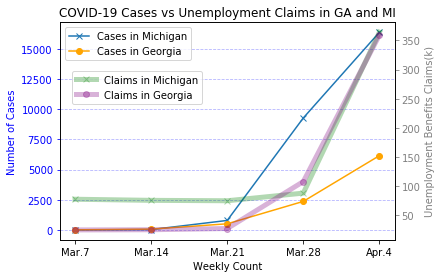

In [125]:
fig,ax1=plt.subplots()
ax1.plot(MI['positive_num'],'-x',label='Cases in Michigan')
ax1.plot(GA['positive_num'],'-o',color='orange',label='Cases in Georgia')
ax1.set_xlabel('Weekly Count')
ax1.set_ylabel('Number of Cases',color='blue')
ax1.tick_params("y",colors='blue')
ax1.legend()
ax1.yaxis.grid(linestyle='--',color='blue',alpha=0.3)
ax2=ax1.twinx()
ax2.plot(MI['claims_k'],'-x',label='Claims in Michigan',color='green',linewidth=5,alpha=0.3)
ax2.plot(GA['claims_k'],'-o',label='Claims in Georgia',color='purple',linewidth=5,alpha=0.3)
ax2.set_ylabel('Unemployment Benefits Claims(k)',color='grey')

ax2.legend(bbox_to_anchor=(0.44,0.8))
ax2.tick_params("y",colors='grey')
a=[0,1,2,3,4]
Day_name=['Mar.7','Mar.14','Mar.21','Mar.28','Apr.4']
plt.xticks(a,Day_name)
plt.title('COVID-19 Cases vs Unemployment Claims in GA and MI')
plt.savefig('Assignment4.png')